In [98]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [99]:
from google.colab import drive
drive.mount('/content/gdrive')
datapath="/content/gdrive/MyDrive/Face Recog"
Actor_folders=os.listdir(datapath)
print(Actor_folders)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Tapsi', 'SRK', 'Salman', 'Deepika', 'Amitabh']


In [100]:
haar_cascade=cv2.CascadeClassifier('haar_face.xml')

In [101]:
data=[]
label=[]
label_1=[]

#Get image face in grayscale in data dictionary and name of actor in label_1 dictionary
for Actor_folder in Actor_folders:
  folder_path=os.path.join(datapath,Actor_folder)
  images=os.listdir(folder_path)
  for image in images:
    image_path=os.path.join(folder_path,image)
    img_array=cv2.imread(image_path)
    #convert to the gray scale
    gray=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    #detect face
    faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)

    #Crop face
    for x,y,w,h in faces_rect:
      faces_roi=gray[y:y+h,x:x+w]
      data.append(faces_roi)
      label.append(Actor_folders.index(Actor_folder))
      label_1.append(Actor_folder)



In [102]:
print(label)
print(label_1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
['Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'Tapsi', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'SRK', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Salman', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Deepika', 'Amitabh', 'Amitabh', 'Amitab

In [103]:
data=np.array(data,dtype='object')
label=np.array(label)

#train face recognizer
face_recognizer=cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(data,label)


#save trained model
#face_recognizer.save("Face_trained.yml")

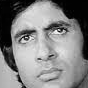

Amitabh : Confidence level is: 101.68987912635858


In [113]:
#Taking a picture to recognize
img=cv2.imread(os.path.join(datapath,'Recog1.jpg'))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)

#Crop face
for x,y,w,h in faces_rect:
      face=gray[y:y+h,x:x+h]
      cv2_imshow(face)
      #Predicting the value
      label,confidence =face_recognizer.predict(face)
      print(Actor_folders[label],": Confidence level is:", confidence)